<a href="https://colab.research.google.com/github/ZTatman/Artificial-Intelligence/blob/master/HW_4/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

## Numpy Implementation of Conv2D (Example Using an MNIST Digit)

Using TensorFlow backend.




Begin show MNIST image 

11493376/11490434 [==============================] - 1s 0us/step
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 7C FD FF 3F 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 60 F4 FB FD 3E 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 7F FB FB FD 3E 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 44 EC FB D3 1F 08 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 3C E4 FB FB 5E 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 9B FD FD BD 0

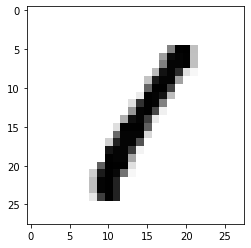


End 



In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print()
def main():
  print("\nBegin show MNIST image \n")

  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

  d = train_images[3]
  d = d.reshape(28,28)
  for row in range(0,28):
    for col in range(0,28):
      print("%02X " % d[row][col], end="")
    print("") 

  lbl = train_labels[3]
  print("\ndigit = ", lbl)

  plt.imshow(d, cmap=plt.get_cmap('gray_r'))
  plt.show()  

  print("\nEnd \n")

if __name__ == "__main__":
  main()


In [0]:
# Problem 1 test case
input_mat = []
kernel_mat = []

# test case 4
input_mat.append(np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]]))
kernel_mat.append(np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]]))

In [4]:
def conv2D(input_mat, patch_mat):

  # Convert Lists to arrays
  if isinstance(input_mat, list):
    input_mat = input_mat[0]

  if isinstance(patch_mat, list):
    patch_mat = patch_mat[0]


  # Make sure each mat is square
  if (input_mat.shape[0] != input_mat.shape[1]):
    raise Exception('Input Matrix is not square.')
  if (patch_mat.shape[0] != patch_mat.shape[1]):
    raise Exception('Patch Matrix is not square.')
  
  # Make sure kernel dimensions are not bigger than input dimensions
  if (input_mat.shape[0] < patch_mat.shape[0]):
    raise Exception('Kernel Matrix dimensions must fit within Input Matrix.')

  # Make sure each mat is not empty
  if (input_mat.shape[0] == 0 and input_mat.shape[1] == 0):
    raise Exception('Input Matrix cannot be empty.')
  if (patch_mat.shape[0] == 0 and patch_mat.shape[1] == 0):
    raise Exception('Patch Matrix cannot be empty.')

  print('\nInput Matrix: \n', input_mat)
  print(f'\nKernel Matrix: \n{patch_mat}\n')

  # List of Matrix values
  mat_values = []
  # List of Max Values of each matrix
  max_values = []
  # Max value count
  val_count = 0
  # Valid padding flag (Tells when to drop values )
  valid_pad_flag = False
  

  # Slide kernel over every postion in feature map 
  # and perform element-wise multpication
  r_count = 0                                         # output_mat row counter
  c_count = 0                                         # output_mat col counter

  k_strt = 0                                        # Cols Indeces
  k_end = patch_mat.shape[1]

  z_strt = 0                                        # Rows Indeces
  z_end = patch_mat.shape[0]
  
  for row in range(0, input_mat.shape[0]):          # For each row of input mat
    # Row Padding
    if (z_end > input_mat.shape[0]):
      valid_pad_flag = True
      z_end = input_mat.shape[0];
    elif (z_end == input_mat.shape[0]):
      z_end = input_mat.shape[0];
      r_count += 1
    else:
      z_end = z_end;
      r_count += 1
    # print(f"---> Row: {z_strt} -> {z_end} , r_pad: {r_pad}")
    
    for col in range(0, input_mat.shape[1]):        # For each col of input mat
      # Col Valid Padding
      if (k_end > input_mat.shape[0]):
        valid_pad_flag = True
        k_end = input_mat.shape[0];
      elif (k_end == input_mat.shape[0]):
        k_end = input_mat.shape[0];
      else:
        k_end = k_end;
      # print(f"---> Col: {k_strt} -> {k_end} , c_pad: {c_pad}")
     
      # Perform element-wise operation (when flag is false)
      sum = 0
      if (valid_pad_flag == False):
      
        # print(f'Valid Values: row[{z_strt}:{z_end}], col[{k_strt}:{k_end}]\n')
        for i in range(z_strt, z_end):
          for j in range(k_strt, k_end):
            product = input_mat[i][j] * int(patch_mat[i - row][j - col])
            sum += product
            mat_values.append(sum)
            # print(f"({input_mat[i][j]})", end="")
            # print(f"({product})", end="")
          # print("")
        # print(f'Summed Element: {sum}')
      else:
        continue

      if (len(mat_values) != 0):
        max_value = max(mat_values)
        max_values.append(max_value)
        val_count += 1
        # print(f"Max Value: {max_value}\n")
        mat_values.clear()
      k_end += 1
      k_strt += 1
    c_pad = 0
    k_end = patch_mat.shape[1]
    k_strt = 0
    z_end += 1
    z_strt += 1
    valid_pad_flag = False
  # print('Value Count: ', val_count)
  # print('Max Values: \n', max_values)
  # print(f'Row/Col Count: rows({r_count}), cols({c_count})\n')
  output_mat = np.asarray(max_values).reshape(r_count,r_count)
  print('\nOutput Matrix: \n', output_mat)
  return output_mat
output_mat = conv2D(input_mat, kernel_mat)



Input Matrix: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Kernel Matrix: 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Output Matrix: 
 [[4]]


# Problem 2


#### Numpy Implementation of MaxPooling2D

In [0]:
import numpy as np

input_mat = []
expected_mat = []
s = []
input_mat.append(np.array([[1, 2, 1, 2, 4, 5],
                      [2, 4, 2, 1, 0, 3],
                      [1, 2, 4, 2, 4, 5],
                      [2, 1, 2, 1, 2, 1],
                      [1, 1, 2, 3, 1, 2],
                      [1, 1, 2, 3, 1, 2]]))
s.append(2)


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def maxpooling2d(input_mat, s):
  # Convert Lists to arrays
  if isinstance(input_mat, list):
    input_mat = input_mat[0]
  
  if isinstance(s, list):
    s = s[0]

  # Make sure each mat is square
  if (input_mat.shape[0] != input_mat.shape[1]):
    raise Exception('Input Matrix is not square.')

  # Make sure each mat dimension not 0
  if (input_mat.shape[0] == 0 or input_mat.shape[1] == 0):
    raise Exception('One or more dimensions of Input Matrix is 0.')

  if (input_mat.shape[0] == 0 and input_mat.shape[1] == 0):
    raise Exception('Input Matrix cannot be empty.')

  # Make sure s > 0
  if (s <= 0): 
    raise Exception('Shape, s, must be greater than 0.')

  # Make sure window size fits within input_mat
  if (s >= input_mat.shape[0]):
    raise Exception(f'Shape, S, must be less than input_mat dimension {input_mat.shape[0]}')

  print('\nInput Matrix: \n', input_mat)
  print(f'\nWindow Shape: ({s},{s})\n')

  # List of Matrix values
  mat_values = []
  # List of Max Values of each matrix
  max_values = []
  # Max value count
  val_count = 0
  

  # Slide kernel over every postion in feature map 
  # and perform element-wise multpication
  r_count = 0                                         # output_mat row counter
  c_count = 0                                         # output_mat col counter

  k_strt = 0                                        # Cols Indeces
  k_end = s
  z_strt = 0                                        # Rows Indeces
  z_end = s
  stride = 2                                        # Stride
  
  for row in range(0, input_mat.shape[0], stride):          # For each row of input mat
    # print(f'-----ROW ITER {row}-----')
    # Row Padding
    if (z_end > input_mat.shape[0]):
      valid_pad_flag = True
      z_end = input_mat.shape[0];
    elif (z_end == input_mat.shape[0]):
      z_end = input_mat.shape[0];
      r_count += 1
    else:
      z_end = z_end;
      r_count += 1

    # print(f"---> Row: {z_strt} -> {z_end} , r_pad: __")


    for col in range(0, input_mat.shape[1], stride):        # For each col of input mat
      # print(f'-----COLUMN ITER {col}-----')
      # print(f"---> Evaluating Col: {k_strt} -> {k_end} , c_pad: __")

      # Col Valid Padding
      if (k_end > input_mat.shape[0]):
        k_end = input_mat.shape[0];
      elif (k_end == input_mat.shape[0]):
        k_end = input_mat.shape[0];
      else:
        k_end = k_end;

      # print(f"---> Col: k_strt:{k_strt} -> k_end:{k_end} , c_pad: __")
      # Perform element-wise operation
      for i in range(z_strt, z_end):
        for j in range(k_strt, k_end):
          product = input_mat[i][j]
          mat_values.append(product)
          # print(f"({product})", end="")
        # print("")
     
      if (len(mat_values) != 0):
        max_value = max(mat_values)
        max_values.append(max_value)
        val_count += 1
        # print(f"Max Value: {max_value}", end="")

      mat_values.clear()
      k_end += stride
      k_strt += stride
      # print(f"\n---> Next Col: {k_strt} -> {k_end} , c_pad: __")

      # print("")
    k_end = s
    k_strt = 0
    z_strt += stride
    z_end = z_strt + s
  # print('Value Count: ', val_count)
  # print('Max Values: \n', max_values)
  dimension = int(np.sqrt(int((np.square(input_mat.shape[0])) / (np.square(s)))))
  # print(dimension)
  output_mat = np.asarray(max_values).reshape(dimension , dimension)
  print('\nOutput Matrix: \n', output_mat)
  return output_mat
  

result = maxpooling2d(input_mat, 2)



Input Matrix: 
 [[1 2 1 2 4 5]
 [2 4 2 1 0 3]
 [1 2 4 2 4 5]
 [2 1 2 1 2 1]
 [1 1 2 3 1 2]
 [1 1 2 3 1 2]]

Window Shape: (2,2)


Output Matrix: 
 [[4 2 5]
 [2 4 5]
 [1 3 2]]
